# Clasificación de digitos

In [3]:
# Cargamos los datos de entrenamiento y testeo (MNIST)
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()




In [17]:
# Comprobamos el dimensionamiento de los datos de entrada y salida
print(train_images.shape) # 6000 imagenes de 28x28
print(train_labels.shape) # 6000 etiquetas
print(test_images.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Graficas

4


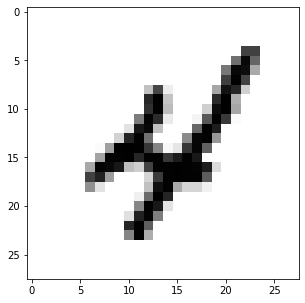

In [15]:
# Graficar datos de entrada
import matplotlib.pyplot as plt # cargamos parque para plotear datos

a = 9 # Escogemos un dato aleatorio
D = train_images[9] # Escogemos de forma aleatoria un dato de entrada
L = train_labels[9] # Buscamos la etiqueta correcta
plt.figure(figsize=(5,5)) # creamos un plot
plt.imshow(D, cmap=plt.cm.binary)
print(L)

In [25]:
# Modificamos la matrix de entranda de las imagenes para tener información vectorizada
x_train = train_images.reshape((train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
x_test = test_images.reshape((test_images.shape[0], test_images.shape[1]*test_images.shape[2]))
x_train = x_train.astype('float32')/255 # Normalizar
x_test = x_test.astype('float32')/255 # Normalizar

In [46]:
from tensorflow.keras.utils import to_categorical # Cargamos paquete de categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(train_labels[0])
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [47]:
# Creamos una red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(28*28, activation='relu', input_shape=(28*28,)))
#
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#0.96, 0.92

In [48]:
model.fit(x_train,y_train,epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2499 - accuracy: 0.9266
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0959 - accuracy: 0.9722
Epoch 3/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0635 - accuracy: 0.9808
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0439 - accuracy: 0.9864
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0319 - accuracy: 0.9904
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0238 - accuracy: 0.9928
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0170 - accuracy: 0.9951
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0121 - accuracy: 0.9969
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0092 - accuracy: 0.9976
Epoch 10/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0064 - accura

In [49]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0628 - accuracy: 0.9824


5217
2
2


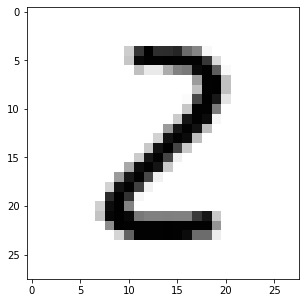

In [127]:
b = np.random.randint(10000)# una posición de las 10000
print(b)
test_digit = test_images[b]
plt.figure(figsize=(5,5)) # creamos un plot
plt.imshow(test_digit, cmap=plt.cm.binary)
print(test_labels[b])
# Ajustando la dimensión de la entrada de prueba
import numpy as np
input = test_digit.reshape((1,28*28))
input = input.astype('float32')/255
output = model(input)
print(np.argmax(output))

3
